In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import json
import math
from dataclasses import dataclass
import statistics
import re
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed = 1231

def same_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
same_seeds(seed)

In [ ]:
from sklearn.model_selection import train_test_split
def preprocess_data(filepath = "../content/drive/MyDrive/python/sessions.json", train_ratio = 0.8, random_seed = 1231):
  data = json.load(open(filepath))
  xDataset = []
  yDataset = []
  humanCount = 0
  botCount = 0
  maxSize = 0
  #print(data['bot'])
  for i in data['human']:
    #break #DEBUG PURPOSES
    yDataset.append(0)
    newpath = i.replace("../../", "drive/MyDrive/")
    #if humanCount == 708: print(newpath)
    #print(newpath) # For testing to see human files
    with open(newpath, "r") as f:
      normalize = f.readline()
      normalize2 = normalize.split(":")[1]
      normalize2 = normalize2.split(",")
      normalize2[1] = normalize2[1].replace("\n","")
      normalizer = [int(x) for x in normalize2]
      rows = f.readlines()[1:]
      row_list = [row.rstrip('\n') for row in rows]
      row_row_list = [ro.split(",") for ro in row_list]
      if (len(row_row_list) > maxSize): # Max Size for Padding
        maxSize = len(row_row_list)
      wip_list = [['0.0' if i == "NaN" else i for i in x] for x in row_row_list]
      final_list = [[float(y) for y in x if bool(re.match(r'^[-+]?[0-9]*\.?[0-9]+$', y)) or 'e-' in y] for x in wip_list]
      #final_list = [convert_to_float(r) for r in row_row_list] Maybe not necessary since tensor needs to be same type
      for num in range(len(final_list)):
        #time, x_cord, y_cord = x[0],x[1],x[2]
        if(num == 1):
          final_list[num][1] = final_list[num][1]/normalizer[0]
        if(num == 2):
          final_list[num][2] = final_list[num][2]/normalizer[1]
      xDataset.append(final_list)
      humanCount+=1
      if humanCount >= 750: break
      #print(xTrain)
    #break # Break for just testing else running will take likely 15 min +
  for m in data['bot']: # Now for Bot Data
    #break # DEBUG PURPOSES
    yDataset.append(1)
    newpath = m.replace("../../", "drive/MyDrive/")
    #print(newpath) # For testing to see first bot file
    with open(newpath, "r") as f:
      normalize = f.readline()
      normalize2 = normalize.split(":")[1]
      normalize2 = normalize2.split(",")
      normalize2[1] = normalize2[1].replace("\n","")
      normalizer = [int(x) for x in normalize2]
      rows = f.readlines()[1:]
      row_list = [row.rstrip('\n') for row in rows]
      row_row_list = [ro.split(",") for ro in row_list]
      if (len(row_row_list) > maxSize): # Max Size for Padding
        maxSize = len(row_row_list)
      final_list = [[float(y) for y in x if bool(re.match(r'^[-+]?[0-9]*\.?[0-9]+$', y) or 'e-' in y)] for x in row_row_list]
      #final_list = [convert_to_float(r) for r in row_row_list] Maybe not necessary since tensor needs to be same type
      for num in range(len(final_list)):
        #time, x_cord, y_cord = x[0],x[1],x[2]
        if(num == 1):
          final_list[num][1] = final_list[num][1]/normalizer[0]
        if(num == 2):
          final_list[num][2] = final_list[num][2]/normalizer[1]
      xDataset.append(final_list)
      botCount+=1
      if botCount >= 750:
        break
      #print(xTrain)
    #break # Break for just testing else running will take likely 15 min +
  #print(maxSize)
  # Padding for equal length for tensor
  for x in xDataset:
    if len(x) < maxSize:
      while(len(x) < maxSize):
        # pads the sequence with [0.0,0.0,0.0]
        x.append([0.0,0.0,0.0])
   # SPLITTING DATASET Issue current facing, can split xTrain_tensor but then the yTrain_tensor would not match it (which i think is useful).
   # maybe random seed being equal may fix this issue inherently, have not looked into it.
  #train_data,valid_data = training_data.split(split_ratio=0.75,random_state=random.seed(SEED))
  # DEBUG FOR IF LESS THAN 3 VALUES IN INPUT
  #for val in range(len(xDataset)):
  #  for valu in range(len(xDataset[val])):
  #    if (len(xDataset[val][valu]) < 3):
  #      print(xDataset[val][valu])
  #      print(val)

  xTrain, xVal, yTrain, yVal = train_test_split(xDataset, yDataset, random_state = random_seed, test_size = 0.2, shuffle = True)
  return xTrain, xVal, yTrain, yVal
  #xDataset_tensor = torch.tensor(xDataset, dtype = torch.float)
  #yDataset_tensor = torch.tensor(yDataset, dtype = torch.float)

  # Length of xTrain_tensor and yTrain_tensor should be same, length of xTrain_tensor[i] and such will be different, length of xTrain_tensor[i][j] should be 3
  #print(len(yDataset_tensor))
  #print(len(xDataset_tensor))
  #print(xDataset_tensor.shape)
#xTrain, xVal, yTrain, yVal = preprocess_data()
#print(xTrain)
#print(yTrain)



In [ ]:
from torch.utils.data import DataLoader, TensorDataset

xTrain, xVal, yTrain, yVal = preprocess_data()
#train_loader = DataLoader(TensorDataset(xTrain, yTrain), batch_size = 10)
#for val in range(len(xTrain)):
 # for valu in range(len(xTrain[val])):
 #   if (len(xTrain[val][valu]) < 3):
 #     print(xTrain[val][valu])
  #    print(val)
#print(len(xTrain)

In [ ]:
print(len(yTrain))
print(len(yVal))

1360
340


In [ ]:
class BasicBlock(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(BasicBlock, self).__init__()

    self.block = nn.Sequential(
      #nn.Linear(input_dim, output_dim),
      nn.ReLU(),
      nn.ReLU(),
      nn.ReLU(),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.ReLU(),
      nn.ReLU(),
      nn.ReLU(),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.ReLU(),
      nn.ReLU(),
      nn.ReLU(),
      nn.ReLU()
    )

  def forward(self, x):
    return self.block(x)


class simpleLSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    super(simpleLSTM, self).__init__()
    self.hidden_dim = hidden_dim
    self.layer_dim = layer_dim

    self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)
    #self.fc = nn.Sequential(
     #       BasicBlock(input_dim, hidden_dim),
    #        *[BasicBlock(hidden_dim, hidden_dim) for _ in range(hidden_size)], #was hidden_layers rather than hidden_size in HW 2, so I hope hidden_size is directly analogous
     #       nn.Linear(hidden_dim, output_dim)
     #   )
    #self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    #if h0 is None or c0 is None:
    h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
    c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
    out, (hn, cn) = self.lstm(x, (h0, c0))
    #out = self.relu(out)
    #out = self.block
    out = self.fc(out[:, -1, :])
    #out = self.sigmoid(out)
    #out = torch.squeeze(out)
    return out

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import random
#device = get_device()
device = "cuda" if torch.cuda.is_available() else "cpu"


#xTrain, xVal, yTrain, yVal = preprocess_data()
xTrain_tensor = torch.tensor(xTrain, dtype = torch.float)
yTrain_tensor = torch.tensor(yTrain, dtype = torch.long)
#yTrain_tensor = torch.tensor(yTrain, dtype = torch.float)
xVal_tensor = torch.tensor(xVal, dtype = torch.float)
#yVal_tensor = torch.tensor(yVal, dtype = torch.float)
yVal_tensor = torch.tensor(yVal, dtype = torch.long)
#xTrain_tensor = xTrain_tensor.cuda()
#yTrain_tensor = yTrain_tensor.cuda()
#xVal_tensor = xVal_tensor.cuda()
#yVal_tensor = yVal_tensor.cuda()


batch_size = 100 #might not be doing anything
input_size = 3 #3 features (Time, X, Y)
hidden_size = 64 # was 64
num_layers = 3 #was 2
output_size = 2

model = simpleLSTM(input_size, hidden_size, num_layers, output_size)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.00005)
#optimizer = optim.RMSprop(model.parameters(), lr = 0.0005) #0.0005
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
training_loss = []
validation_loss = []
n_epochs = 25
for epoch in range(n_epochs):
  # Training
  train_acc = 0.0
  train_loss = 0.0

  optimizer.zero_grad()
  outputs = model(xTrain_tensor)
  #print(outputs)
  loss = criterion(outputs, yTrain_tensor)
  loss.backward()
  optimizer.step()
  #print(outputs)
  #print("hello")
  _, train_pred = torch.max(outputs, 1)
  #print(train_pred)
  predicted_labels = torch.argmax(outputs, dim=1)
  #print(predicted_labels)
  #print("break")
  values, target = torch.max(outputs, -1)
  #accuracy = accuracy_score(yTrain_tensor, target)
  #print("\nTraining accuracy is %d%%" % (accuracy*100))
  #print(train_pred)
  #print(train_pred)
  train_acc += (train_pred.detach() == yTrain_tensor.detach()).sum().item()
  #print(train_acc)
  #train_loss += loss.item()
  training_loss.append(loss.item())
  print(f'Training Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item()}, Acc: {train_acc/len(yTrain_tensor)}')

  # Validation
  val_acc = 0.0
  val_loss = 0.0
  with torch.no_grad():
    outputs = model(xVal_tensor)
    loss = criterion(outputs, yVal_tensor)

    _, val_pred = torch.max(outputs, 1)
    #print(val_pred)
    val_acc += (val_pred.cpu() == yVal_tensor.cpu()).sum().item()
    validation_loss.append(loss.item())
    #val_loss += loss.item()
    print(f'Validation Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item()}, Acc: {val_acc/len(yVal_tensor)}')
  # Shuffle
  indices = torch.randperm(xTrain_tensor.size()[0])
  indices2 = torch.randperm(xVal_tensor.size()[0])
  xTrain_tensor = xTrain_tensor[indices]
  yTrain_tensor = yTrain_tensor[indices]
  xVal_tensor = xVal_tensor[indices2]
  yVal_tensor = yVal_tensor[indices2]
  #print(f'[{epoch+1:03d}/{n_epochs:03d}] Train Acc: {train_acc/len(xTrain_tensor[0]):3.5f} Loss: {train_loss/len(xTrain_tensor[0]):3.5f} | Val Acc: {val_acc/len(xVal_tensor[0]):3.5f} loss: {val_loss/len(xVal_tensor[0]):3.5f}')

#batch = 256

Training Epoch [1/15], Loss: 0.6949933171272278, Acc: 0.5044117647058823
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

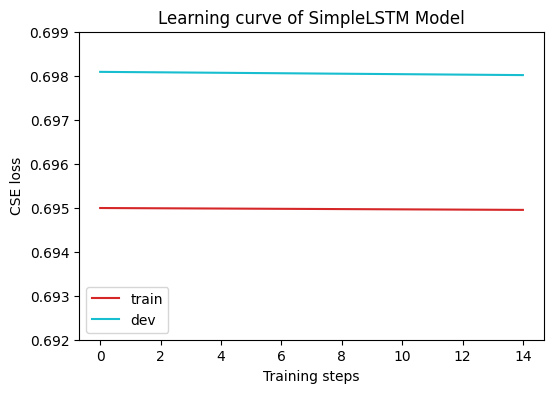

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_learning_curve(train_loss, val_loss):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(train_loss)
    x_1 = range(total_steps)
    x_2 = x_1[::len(train_loss) // len(val_loss)]
    figure(figsize=(6, 4))
    plt.plot(x_1, train_loss, c='tab:red', label='train')
    plt.plot(x_2, val_loss, c='tab:cyan', label='dev')
    plt.ylim(0.692, 0.699)
    plt.xlabel('Training steps')
    plt.ylabel('CSE loss')
    plt.title('Learning curve of SimpleLSTM Model')
    plt.legend()
    plt.show()


plot_learning_curve(training_loss, validation_loss)